In [74]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError, R2Score
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler

In [2]:
!mkdir -p /root/.config/kaggle/
!cp /content/drive/MyDrive/kaggle.json /root/.config/kaggle/kaggle.json
!chmod 600 /root/.config/kaggle/kaggle.json

In [3]:
import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files('hrokrin/the-largest-diamond-dataset-currely-on-kaggle', path="/content/", unzip=True)

Dataset URL: https://www.kaggle.com/datasets/hrokrin/the-largest-diamond-dataset-currely-on-kaggle


In [4]:
# Reading the dataset
data = pd.read_csv("diamonds.csv")
print(data.head())

   Unnamed: 0    cut color clarity  carat_weight cut_quality  lab   symmetry  \
0           0  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
1           1  Round     E    VVS2          0.09   Very Good  IGI  Very Good   
2           2  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
3           3  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
4           4  Round     E    VVS2          0.09   Very Good  IGI  Very Good   

      polish eye_clean  ... meas_depth girdle_min  girdle_max  fluor_color  \
0  Very Good   unknown  ...       1.79          M           M      unknown   
1  Very Good   unknown  ...       1.78        STK         STK      unknown   
2  Very Good   unknown  ...       1.77         TN           M      unknown   
3  Very Good   unknown  ...       1.78          M         STK      unknown   
4  Excellent   unknown  ...       1.82        STK         STK      unknown   

   fluor_intensity  fancy_color_dominant_color  fa

In [5]:
# After loading the data
print("\nAvailable columns in the dataset:")
print(data.columns.tolist())


Available columns in the dataset:
['Unnamed: 0', 'cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity', 'total_sales_price']


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   219703 non-null  int64  
 1   cut                          219703 non-null  object 
 2   color                        219703 non-null  object 
 3   clarity                      219703 non-null  object 
 4   carat_weight                 219703 non-null  float64
 5   cut_quality                  219703 non-null  object 
 6   lab                          219703 non-null  object 
 7   symmetry                     219703 non-null  object 
 8   polish                       219703 non-null  object 
 9   eye_clean                    219703 non-null  object 
 10  culet_size                   219703 non-null  object 
 11  culet_condition              219703 non-null  object 
 12  depth_percent                219703 non-null  float64
 13 

In [7]:
# Data Preprocessing
print("Checking for null values:")
print(data.isnull().sum())

Checking for null values:
Unnamed: 0                          0
cut                                 0
color                               0
clarity                             0
carat_weight                        0
cut_quality                         0
lab                                 0
symmetry                            0
polish                              0
eye_clean                           0
culet_size                          0
culet_condition                     0
depth_percent                       0
table_percent                       0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                          0
girdle_max                          0
fluor_color                         0
fluor_intensity                143491
fancy_color_dominant_color          0
fancy_color_secondary_color         0
fancy_color_overtone             1650
fancy_color_intensity               0
total_sales_price       

In [8]:
# Remove the index column
data = data.drop(columns='Unnamed: 0')

In [9]:
# Handling "unknown" values
def print_unknown_counts(df):
    for column in df.columns:
        unknown_count = df[df[column] == "unknown"].shape[0]
        if unknown_count > 0:
            print(f"Column '{column}' has {unknown_count} 'unknown' values")

print("\nCounting 'unknown' values before preprocessing:")
print_unknown_counts(data)


Counting 'unknown' values before preprocessing:
Column 'color' has 9162 'unknown' values
Column 'cut_quality' has 60607 'unknown' values
Column 'eye_clean' has 156916 'unknown' values
Column 'culet_size' has 85740 'unknown' values
Column 'culet_condition' has 204384 'unknown' values
Column 'girdle_min' has 83432 'unknown' values
Column 'girdle_max' has 84295 'unknown' values
Column 'fluor_color' has 203977 'unknown' values
Column 'fluor_intensity' has 128 'unknown' values
Column 'fancy_color_dominant_color' has 210539 'unknown' values
Column 'fancy_color_secondary_color' has 218641 'unknown' values
Column 'fancy_color_overtone' has 217665 'unknown' values
Column 'fancy_color_intensity' has 210541 'unknown' values


In [10]:
# Replace "unknown" with NaN
data = data.replace("unknown", np.nan)

In [11]:
# Identify numerical and categorical columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
categorical_columns = data.select_dtypes(exclude=[np.number]).columns

print(f"\nNumber of numerical columns: {len(numeric_columns)}")
print(f"Number of categorical columns: {len(categorical_columns)}")

print("\nNumerical columns:")
print(numeric_columns.tolist())

print("\nCategorical columns:")
print(categorical_columns.tolist())


Number of numerical columns: 7
Number of categorical columns: 18

Numerical columns:
['carat_weight', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'total_sales_price']

Categorical columns:
['cut', 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition', 'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity']


In [12]:
# Store pre-imputation statistics
pre_imputation_stats = data.describe(include='all')

In [13]:
# For numerical columns, we can impute with median
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

In [14]:
# For categorical columns, we can impute with mode (most frequent value)
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

In [15]:
# Post-imputation report
def generate_imputation_report(pre_stats, post_data):
    print("\n--- Imputation Report ---")

    # Check for remaining null values
    null_counts = post_data.isnull().sum()
    if null_counts.sum() > 0:
        print("\nColumns with remaining null values:")
        print(null_counts[null_counts > 0])
    else:
        print("\nAll null values have been successfully imputed.")

    # Compare pre and post imputation statistics
    post_stats = post_data.describe(include='all')

    print("\nChanges in numerical columns:")
    for col in numeric_columns:
        pre_median = pre_stats.loc['50%', col]
        post_median = post_stats.loc['50%', col]
        if pre_median != post_median:
            print(f"  {col}: median changed from {pre_median} to {post_median}")

    print("\nChanges in categorical columns:")
    for col in categorical_columns:
        if 'top' in pre_stats[col] and 'top' in post_stats[col]:
            pre_mode = pre_stats.loc['top', col]
            post_mode = post_stats.loc['top', col]
            if pre_mode != post_mode:
                print(f"  {col}: mode changed from {pre_mode} to {post_mode}")

    # Check for any new unique values (this shouldn't happen with our current imputation strategy)
    print("\nChecking for new unique values after imputation:")
    for col in post_data.columns:
        pre_unique = set(pre_stats[col].unique())
        post_unique = set(post_data[col].unique())
        new_values = post_unique - pre_unique
        if new_values:
            print(f"  {col}: New unique values: {new_values}")

In [16]:
# Generate and print the report
generate_imputation_report(pre_imputation_stats, data)


--- Imputation Report ---

All null values have been successfully imputed.

Changes in numerical columns:

Changes in categorical columns:

Checking for new unique values after imputation:
  cut: New unique values: {'Pear', 'Cushion Modified', 'Oval', 'Emerald', 'Cushion', 'Asscher', 'Marquise', 'Princess', 'Heart', 'Radiant'}
  color: New unique values: {'D', 'L', 'H', 'J', 'M', 'I', 'K', 'F', 'G'}
  clarity: New unique values: {'I3', 'VS1', 'SI2', 'VS2', 'VVS2', 'I2', 'I1', 'VVS1', 'SI3', 'IF'}
  carat_weight: New unique values: {0.25, 0.75, 1.25, 1.5, 2.25, 2.0, 2.5, 3.0, 3.5, 4.0, 1.75, 2.75, 5.67, 15.0, 3.75, 3.25, 10.04, 10.01, 12.52, 4.25, 4.5, 4.75, 16.02, 18.16, 5.25, 5.0, 5.5, 5.75, 6.0, 6.5, 6.25, 7.0, 7.25, 7.75, 8.0, 8.5, 2.86, 9.0, 3.11, 3.61, 3.36, 3.86, 10.0, 11.25, 12.0, 0.21, 13.25, 4.22, 4.47, 4.72, 17.53, 5.22, 5.47, 6.22, 0.42, 0.46, 8.44, 8.19, 8.22, 9.22, 9.69, 10.22, 10.94, 11.19, 11.69, 12.22, 12.19, 0.17, 4.19, 4.44, 4.69, 5.19, 5.44, 5.69, 6.19, 6.69, 7.44, 

In [17]:
print("\nCounting 'unknown' values after preprocessing:")
print_unknown_counts(data)


Counting 'unknown' values after preprocessing:


In [18]:
print("\nUnique values in each column:")
print(data.nunique())


Unique values in each column:
cut                               11
color                             10
clarity                           11
carat_weight                     878
cut_quality                        5
lab                                3
symmetry                           5
polish                             5
eye_clean                          4
culet_size                         8
culet_condition                    3
depth_percent                    534
table_percent                    235
meas_length                     1415
meas_width                      1155
meas_depth                       852
girdle_min                         9
girdle_max                         9
fluor_color                        5
fluor_intensity                    6
fancy_color_dominant_color        12
fancy_color_secondary_color       10
fancy_color_overtone               7
fancy_color_intensity              9
total_sales_price              22202
dtype: int64


In [19]:
print("\nChecking for duplicates:")
print(data[data.duplicated()])
data = data.drop_duplicates()


Checking for duplicates:
             cut color clarity  carat_weight cut_quality  lab   symmetry  \
111        Round     L      I2          0.31   Very Good  GIA  Very Good   
238        Round     E     VS1          0.14   Excellent  IGI  Very Good   
240        Round     E     VS1          0.14   Excellent  IGI  Very Good   
241        Round     E     VS1          0.14   Excellent  IGI  Very Good   
276        Round     F    VVS2          0.14   Excellent  IGI  Excellent   
...          ...   ...     ...           ...         ...  ...        ...   
219494   Radiant     E     VS1         15.95   Excellent  GIA       Good   
219506   Radiant     G     VS2          9.05   Excellent  GIA  Very Good   
219542   Emerald     K     VS2         15.14   Excellent  GIA  Very Good   
219551  Princess     G     VS2          9.05   Excellent  GIA  Very Good   
219586   Radiant     F     SI1         10.02   Excellent  GIA  Very Good   

           polish eye_clean culet_size  ... meas_depth  girdl

In [20]:
# Encoding categorical variables
le = LabelEncoder()
df = data.copy()
for col in data.columns:
    if data[col].dtype == 'object':
        df[col] = le.fit_transform(data[col])
        joblib.dump(le, f'{col}_encoder.joblib', compress=9)

print("\nEncoded data:")
print(df.head())
print(df.info())


Encoded data:
   cut  color  clarity  carat_weight  cut_quality  lab  symmetry  polish  \
0   10      1       10          0.09            0    2         4       4   
1   10      1       10          0.09            4    2         4       4   
2   10      1       10          0.09            0    2         4       4   
3   10      1       10          0.09            0    2         4       4   
4   10      1       10          0.09            4    2         4       0   

   eye_clean  culet_size  ...  meas_depth  girdle_min  girdle_max  \
0          3           3  ...        1.79           0           0   
1          3           3  ...        1.78           1           1   
2          3           3  ...        1.77           4           0   
3          3           3  ...        1.78           0           1   
4          3           3  ...        1.82           1           1   

   fluor_color  fluor_intensity  fancy_color_dominant_color  \
0            0                0                   

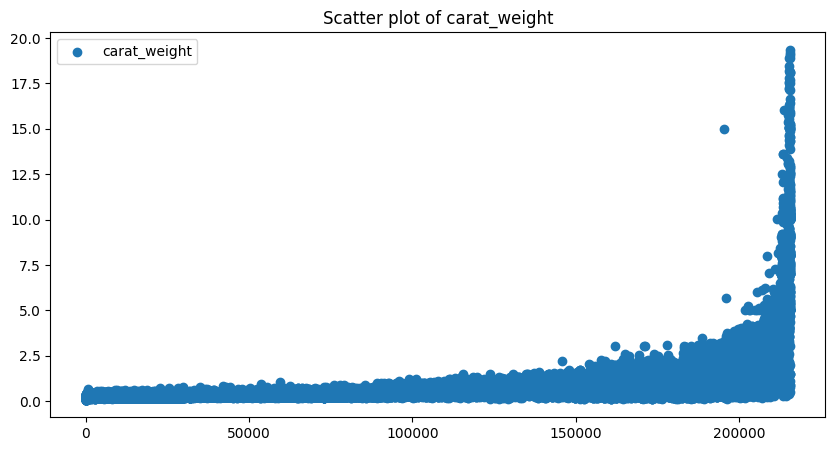

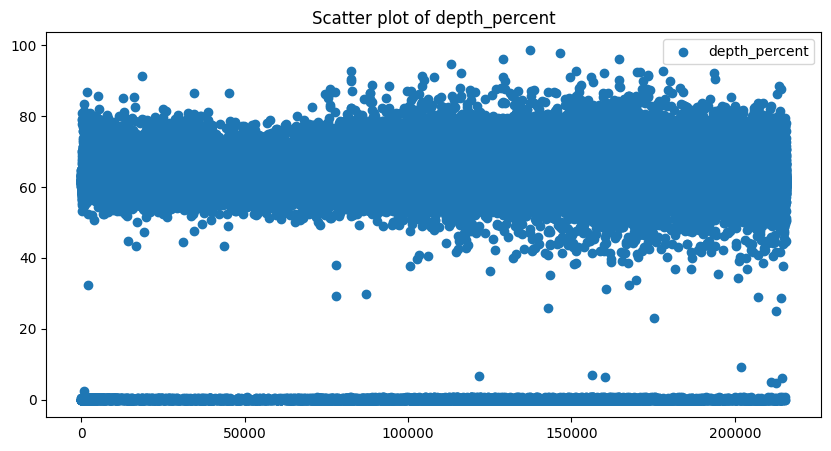

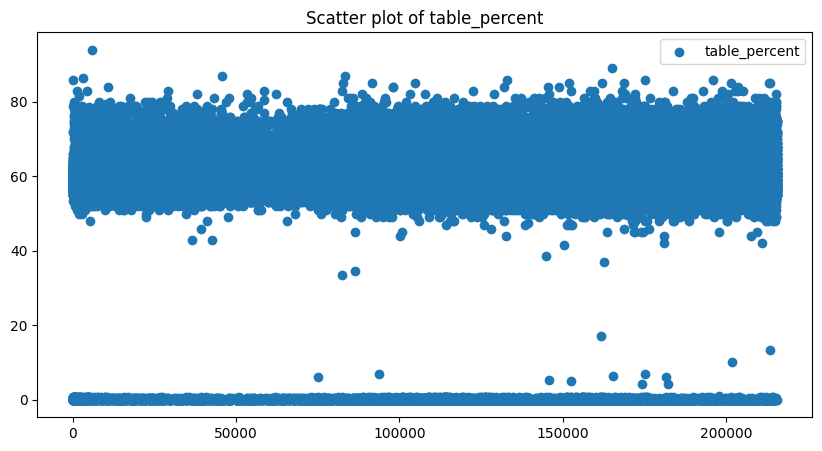

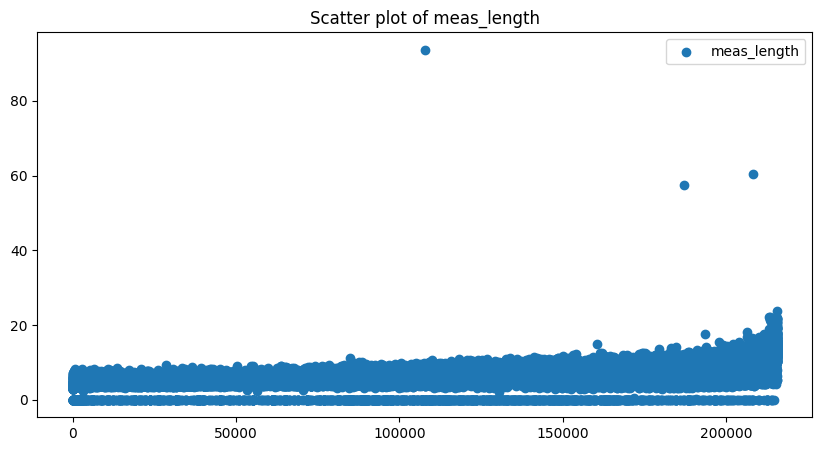

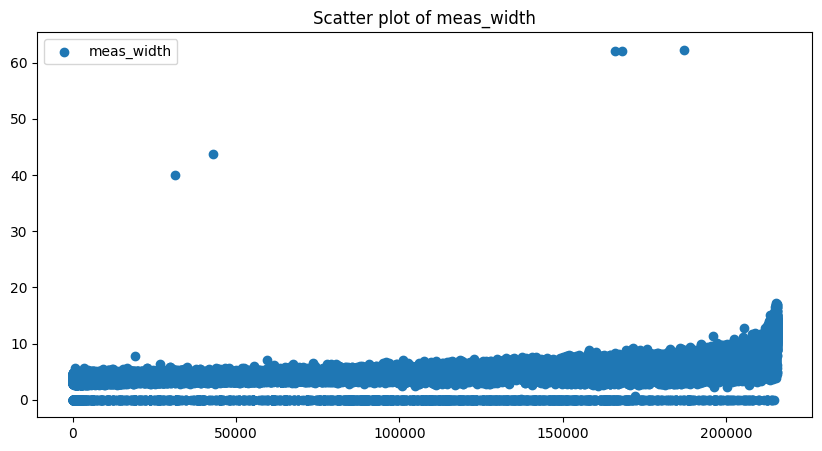

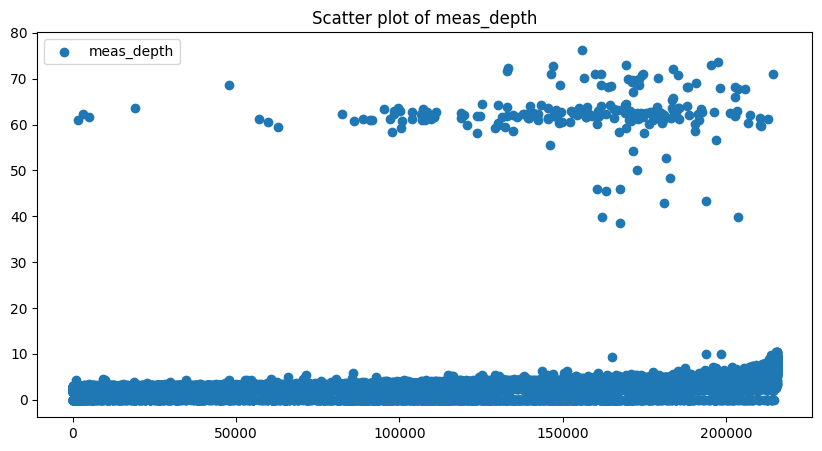


Checking for zero values in measured parameters:
        cut  color  clarity  carat_weight  cut_quality  lab  symmetry  polish  \
24       10      8        0          0.34            0    2         0       0   
25       10      2        9          0.09            0    2         4       4   
26       10      1        9          0.09            4    2         4       4   
44       10      0        7          0.11            0    2         4       0   
45       10      1        7          0.11            0    2         4       4   
...     ...    ...      ...           ...          ...  ...       ...     ...   
218830   10      1        4          5.07            0    0         0       4   
219389    7      1       10         15.52            0    0         4       0   
219415   10      2        7          6.28            0    0         0       0   
219530    7      4        7         11.95            0    1         4       0   
219570   10      0        3          5.34            4    0

In [21]:
# Outlier detection and removal
def plot_scatter(dataframe):
    for col in dataframe.select_dtypes(include=['float64']):
        plt.figure(figsize=(10, 5))
        plt.scatter(range(len(dataframe[col])), dataframe[col], label=col)
        plt.legend()
        plt.title(f'Scatter plot of {col}')
        plt.show()

plot_scatter(df)

df = df[(df.meas_length < 40) & (df.meas_width < 30) & (df.meas_depth < 30)]

print("\nChecking for zero values in measured parameters:")
print(df[(df.meas_width == 0) | (df.meas_depth == 0) | (df.meas_length == 0) | (df.depth_percent == 0) | (df.table_percent == 0)])

df = df[(df.meas_width != 0) & (df.meas_depth != 0) & (df.meas_length != 0) & (df.depth_percent != 0) & (df.table_percent != 0)]

print("\nShape after removing outliers and zero values:")
print(df.shape)

In [22]:
# Feature Engineering
print("\nPerforming feature engineering...")
if 'meas_length' in df.columns and 'meas_width' in df.columns and 'meas_depth' in df.columns:
    df['volume'] = df['meas_length'] * df['meas_width'] * df['meas_depth']
    print("Added 'volume' feature")
else:
    print("Couldn't add 'volume' feature due to missing measurement columns")

if 'meas_length' in df.columns and 'meas_width' in df.columns:
    df['aspect_ratio'] = df['meas_length'] / df['meas_width']
    print("Added 'aspect_ratio' feature")
else:
    print("Couldn't add 'aspect_ratio' feature due to missing measurement columns")


Performing feature engineering...
Added 'volume' feature
Added 'aspect_ratio' feature


In [23]:
# Non-linear Transformations
if 'carat' in df.columns:
    df['log_carat'] = np.log1p(df['carat'])
    print("Added 'log_carat' feature")
else:
    print("Couldn't add 'log_carat' feature because 'carat' column is not present")

if 'depth_percent' in df.columns:
    df['sqrt_depth'] = np.sqrt(df['depth_percent'])
    print("Added 'sqrt_depth' feature")
else:
    print("Couldn't add 'sqrt_depth' feature because 'depth_percent' column is not present")

Couldn't add 'log_carat' feature because 'carat' column is not present
Added 'sqrt_depth' feature



Performing feature selection...


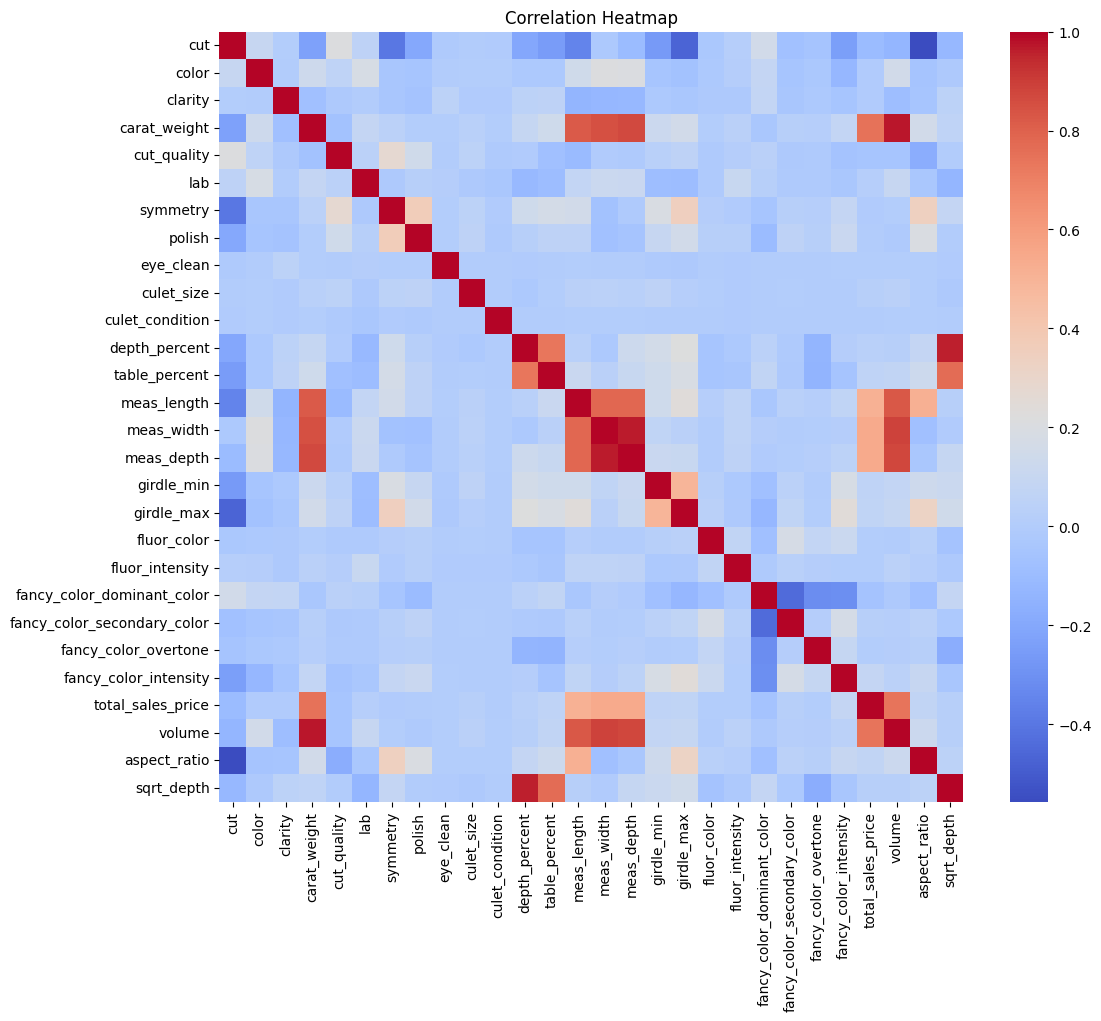

In [24]:
# Feature selection and Data splitting
print("\nPerforming feature selection...")
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
# Identify the target variable
target_variable = 'total_sales_price'
if target_variable not in df.columns:
    print(f"Error: Target variable '{target_variable}' not found in the dataset.")
    print("Available columns:", df.columns.tolist())
    raise ValueError("Target variable not found in the dataset")

In [26]:
# Feature selection using f_regression
X = df.drop(target_variable, axis=1)
y = df[target_variable]

fs = SelectKBest(f_regression, k=min(15, len(X.columns)))
X_new = fs.fit_transform(X, y)
selected_features = X.columns[fs.get_support()].tolist()

print("\nSelected features:")
print(selected_features)

X = df[selected_features]
y = df[target_variable].values.reshape(-1, 1)


Selected features:
['cut', 'carat_weight', 'cut_quality', 'culet_size', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fancy_color_dominant_color', 'fancy_color_intensity', 'volume', 'aspect_ratio']


In [27]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Function to evaluate models
def evaluate_model(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    return cv_scores.mean()

In [29]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Linear Regression with standardized features
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
print("Linear Regression (standardized):")
print(f"MAE: {mean_absolute_error(y_test, lr_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, lr_pred):.4f}")

Linear Regression (standardized):
MAE: 3566.58
R2 Score: 0.5858


In [31]:
# Ridge Regression
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
print("\nRidge Regression:")
print(f"MAE: {mean_absolute_error(y_test, ridge_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, ridge_pred):.4f}")


Ridge Regression:
MAE: 3566.47
R2 Score: 0.5858


In [32]:
# Lasso Regression
lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=1.0))
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
print("\nLasso Regression:")
print(f"MAE: {mean_absolute_error(y_test, lasso_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, lasso_pred):.4f}")


Lasso Regression:
MAE: 3564.80
R2 Score: 0.5858


In [33]:
# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_pred = poly_model.predict(X_test_poly)
print("\nPolynomial Regression (degree 2):")
print(f"MAE: {mean_absolute_error(y_test, poly_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, poly_pred):.4f}")


Polynomial Regression (degree 2):
MAE: 2817.48
R2 Score: 0.6263


In [34]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest:")
print(f"MAE: {mean_absolute_error(y_test, rf_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, rf_pred):.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest:
MAE: 2339.79
R2 Score: 0.6985


In [35]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("\nGradient Boosting:")
print(f"MAE: {mean_absolute_error(y_test, gb_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, gb_pred):.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



Gradient Boosting:
MAE: 2475.34
R2 Score: 0.6761


In [36]:
# Feature Importance (using Random Forest)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


Top 10 Most Important Features:
                       feature  importance
1                 carat_weight    0.655779
13                      volume    0.077630
11  fancy_color_dominant_color    0.037885
4                depth_percent    0.031885
7                   meas_width    0.029286
8                   meas_depth    0.028935
14                aspect_ratio    0.028861
5                table_percent    0.028781
12       fancy_color_intensity    0.027154
6                  meas_length    0.025088


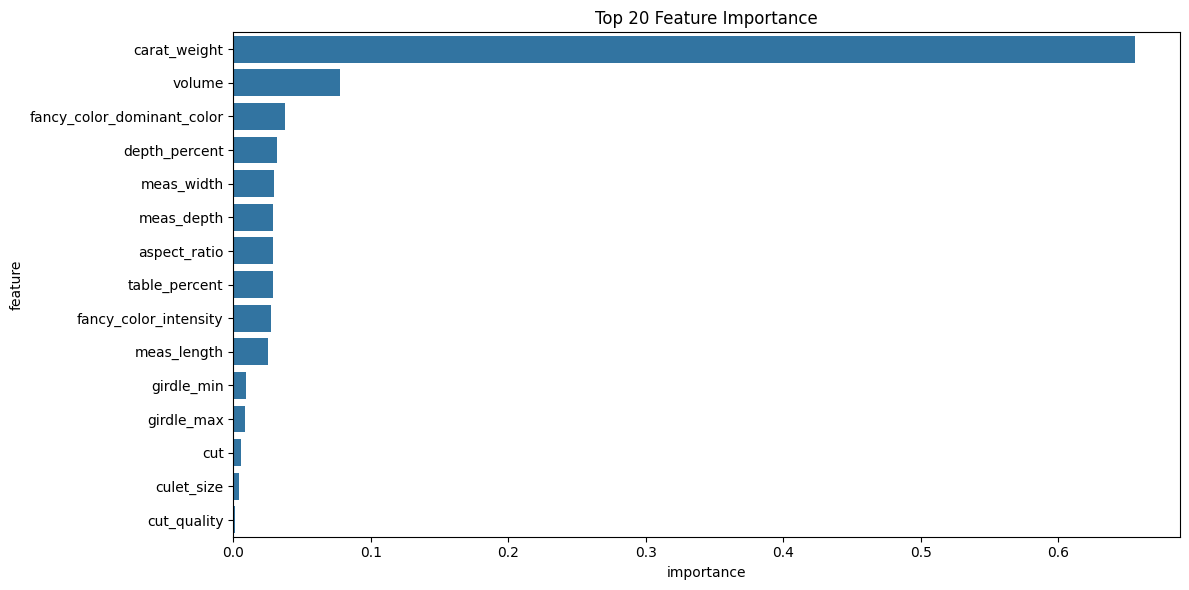

In [37]:
# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importance')
plt.tight_layout()
plt.show()

In [38]:
# Save best performing model
joblib.dump(rf_model, 'best_model.joblib')

print("\nBest performing model saved successfully.")


Best performing model saved successfully.


In [42]:
# Check for GPU availability
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [43]:
# If GPU is available, set memory growth to avoid OOM errors
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Memory growth set to True for GPU")
    except RuntimeError as e:
        print(e)

Memory growth set to True for GPU


In [60]:
# Standardize the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# Function to build the ANN model
def build_nn_model(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dense(1)
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=[RootMeanSquaredError(name='rmse'),
                           MeanAbsoluteError(name='mae'),
                           R2Score(name='r2')])
    return model

In [66]:
# Create and train the model
nn_model = build_nn_model(X_train_scaled.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
# Callbacks for better training
early_stopping = EarlyStopping(patience=20, restore_best_weights=True, start_from_epoch=50)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=10, min_lr=0.00001)

In [68]:
# Train the model
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    batch_size=128,
    epochs=200,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/200
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 689303360.0000 - mae: 6990.0981 - r2: -0.0778 - rmse: 26193.9375 - val_loss: 682000384.0000 - val_mae: 6870.7354 - val_r2: -0.0712 - val_rmse: 26115.1367 - learning_rate: 0.0010
Epoch 2/200
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 706940992.0000 - mae: 6957.3540 - r2: -0.0699 - rmse: 26567.8770 - val_loss: 677196416.0000 - val_mae: 6797.5376 - val_r2: -0.0636 - val_rmse: 26022.9980 - learning_rate: 0.0010
Epoch 3/200
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 652007296.0000 - mae: 6750.5293 - r2: -0.0660 - rmse: 25498.8203 - val_loss: 671036352.0000 - val_mae: 6697.4121 - val_r2: -0.0540 - val_rmse: 25904.3691 - learning_rate: 0.0010
Epoch 4/200
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 708805696.0000 - mae: 6720.5684 - r2: -0.0527 - rmse: 26558.7168 - val_loss: 664463360.0000 - val_mae: 6538.6313 - val_r2: -0.0436 - val_rmse: 25777.1855 - learning_rate: 0.0010
Epoch 5/200
1052/1052 ━━━━━━━━━━━━━

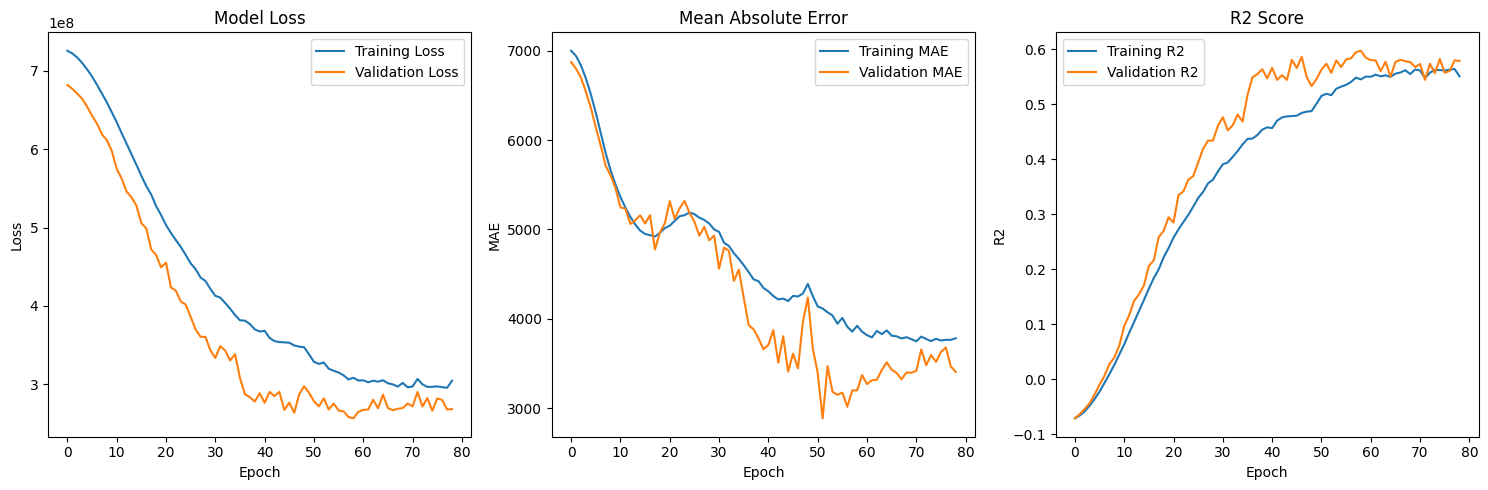

In [69]:
# Plot training history
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['r2'], label='Training R2')
plt.plot(history.history['val_r2'], label='Validation R2')
plt.title('R2 Score')
plt.xlabel('Epoch')
plt.ylabel('R2')
plt.legend()

plt.tight_layout()
plt.show()


In [71]:
def plot_predictions_vs_actual(y_true, y_pred, title):
    # Calculate metrics
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # Create the plot
    plt.figure(figsize=(12, 8))

    # Scatter plot
    plt.scatter(y_true, y_pred, alpha=0.5)

    # Perfect prediction line
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

    # Regression line
    z = np.polyfit(y_true.flatten(), y_pred.flatten(), 1)
    p = np.poly1d(z)
    plt.plot(y_true, p(y_true), "b-", label='Regression Line')

    # Customize the plot
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{title}\nR² = {r2:.4f}, MAE = {mae:.2f}, RMSE = {rmse:.2f}')
    plt.legend()

    # Add text box with metrics
    textstr = f'R² = {r2:.4f}\nMAE = {mae:.2f}\nRMSE = {rmse:.2f}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', bbox=props)

    # Show the plot
    plt.tight_layout()
    plt.show()

In [70]:
# Evaluate the model
test_results = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"\nNeural Network Test Results:")
for name, value in zip(nn_model.metrics_names, test_results):
    print(f"{name}: {value:.4f}")

y_pred_nn = nn_model.predict(X_test)


Neural Network Test Results:
loss: 328586330112.0000
compile_metrics: 573224.5000
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


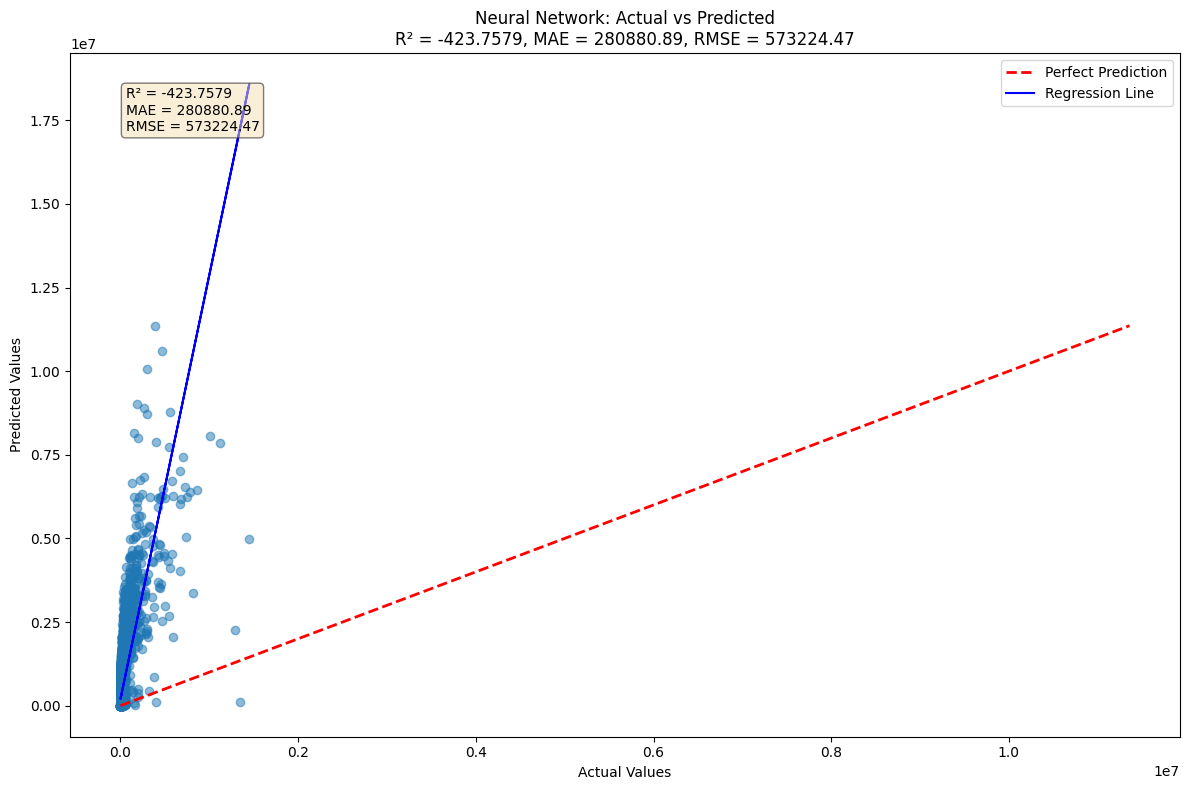

In [75]:
# Plot predictions vs actual values
plot_predictions_vs_actual(y_test, y_pred_nn, 'Neural Network: Actual vs Predicted')

In [76]:
# Save the model
nn_model.save('ann_model.h5')
print("\nNeural Network model saved successfully.")


Neural Network model saved successfully.
